# Import Libraries and Load Data
Import necessary libraries such as pandas, numpy, matplotlib, and seaborn. Load the data from the provided source and display the first few rows to understand its structure.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided source
data = pd.read_csv('processed_data\processed_data.csv')

# Display the first few rows of the data to understand its structure
data.head()

,t,s_x,s_y,s_z,v_x,v_y,v_z,m_x,m_y,m_z,phase
0,0.000000,-10147.288288,12272.952755,2381.457744,-6.770890,1.027623,0.753389,-313994.361854,248590.106957,36544.723524,0
1,1.000001,-10551.807987,12332.536955,2426.256457,-6.713273,0.959113,0.739987,-314029.137993,248543.335649,36543.757838,0
2,2.000000,-10952.901870,12388.115469,2470.266260,-6.656698,0.894061,0.727088,-314063.907067,248496.558758,36542.791330,0
3,3.000000,-11350.632795,12439.888806,2513.516511,-6.601175,0.832237,0.714665,-314098.669077,248449.776286,36541.824000,0
4,4.000000,-11745.063947,12488.044308,2556.035055,-6.546706,0.773432,0.702693,-314133.424021,248402.988233,36540.855849,0


# Data Overview and Preprocessing
Check data types, missing values, and basic statistics. Convert time to datetime format if needed and handle any anomalies in the dataset.

In [5]:
# Check data types of each column
data.dtypes

# Check for missing values in the dataset
data.isnull().sum()

# Get basic statistics of the dataset
data.describe()

# Check for any anomalies in the dataset
# For example, checking for negative values in columns that should only have positive values
anomalies = data[(data[['s_x', 's_y', 's_z', 'v_x', 'v_y', 'v_z', 'm_x', 'm_y', 'm_z']] < 0).any(axis=1)]
anomalies

,t,s_x,s_y,s_z,v_x,v_y,v_z,m_x,m_y,m_z,phase
0,0.000000,-10147.288288,12272.952755,2381.457744,-6.770890,1.027623,0.753389,-313994.361854,248590.106957,36544.723524,0
1,1.000001,-10551.807987,12332.536955,2426.256457,-6.713273,0.959113,0.739987,-314029.137993,248543.335649,36543.757838,0
2,2.000000,-10952.901870,12388.115469,2470.266260,-6.656698,0.894061,0.727088,-314063.907067,248496.558758,36542.791330,0
3,3.000000,-11350.632795,12439.888806,2513.516511,-6.601175,0.832237,0.714665,-314098.669077,248449.776286,36541.824000,0
4,4.000000,-11745.063947,12488.044308,2556.035055,-6.546706,0.773432,0.702693,-314133.424021,248402.988233,36540.855849,0
...,...,...,...,...,...,...,...,...,...,...,...
36494,36494.000000,-3689.105714,-4686.075529,-3780.790836,-3.704410,-0.355324,9.854270,-191409.418232,356094.663714,35404.958632,0
36495,36495.000000,-3901.079054,-4695.007427,-3181.146569,-3.330497,0.088424,10.139194,-191460.650220,356067.215265,35406.256241,0
36496,36496.000001,-4086.356330,-4673.162464,-2563.997299,-2.855091,0.627148,10.421597,-191511.877994,356039.759163,35407.553075,0
36497,36497.000000,-4251.788602,-4628.654483,-1934.514391,-2.784611,0.720583,10.505862,-191563.101550,356012.295408,35408.849134,0


# Basic Statistical Analysis
Calculate descriptive statistics for all numerical columns. Generate histograms and box plots to visualize the distribution of each variable.

                  t            s_x            s_y           s_z           v_x  \
count  36499.000000   36499.000000   36499.000000  36499.000000  36499.000000   
mean   18249.000000   96453.424981  -85731.298790 -19742.829255      0.002500   
std    10536.498074  250784.472068  221340.761557  21382.755945      0.895865   
min        0.000000 -339058.651612 -377826.232949 -56231.444020     -6.770890   
25%     9124.500000 -154241.014907 -292512.555413 -37742.284434     -0.468367   
50%    18249.000000  203899.651309 -129826.199474 -23427.349726     -0.009235   
75%    27373.500000  297160.076614  125984.180020   -244.597916      0.734756   
max    36498.000000  374549.495793  280631.217882  13175.645453      3.161688   

                v_y           v_z            m_x            m_y           m_z  \
count  36499.000000  36499.000000   36499.000000   36499.000000  36499.000000   
mean      -0.007676     -0.001667   12471.561884    8753.973399   -176.149346   
std        0.750624      0.

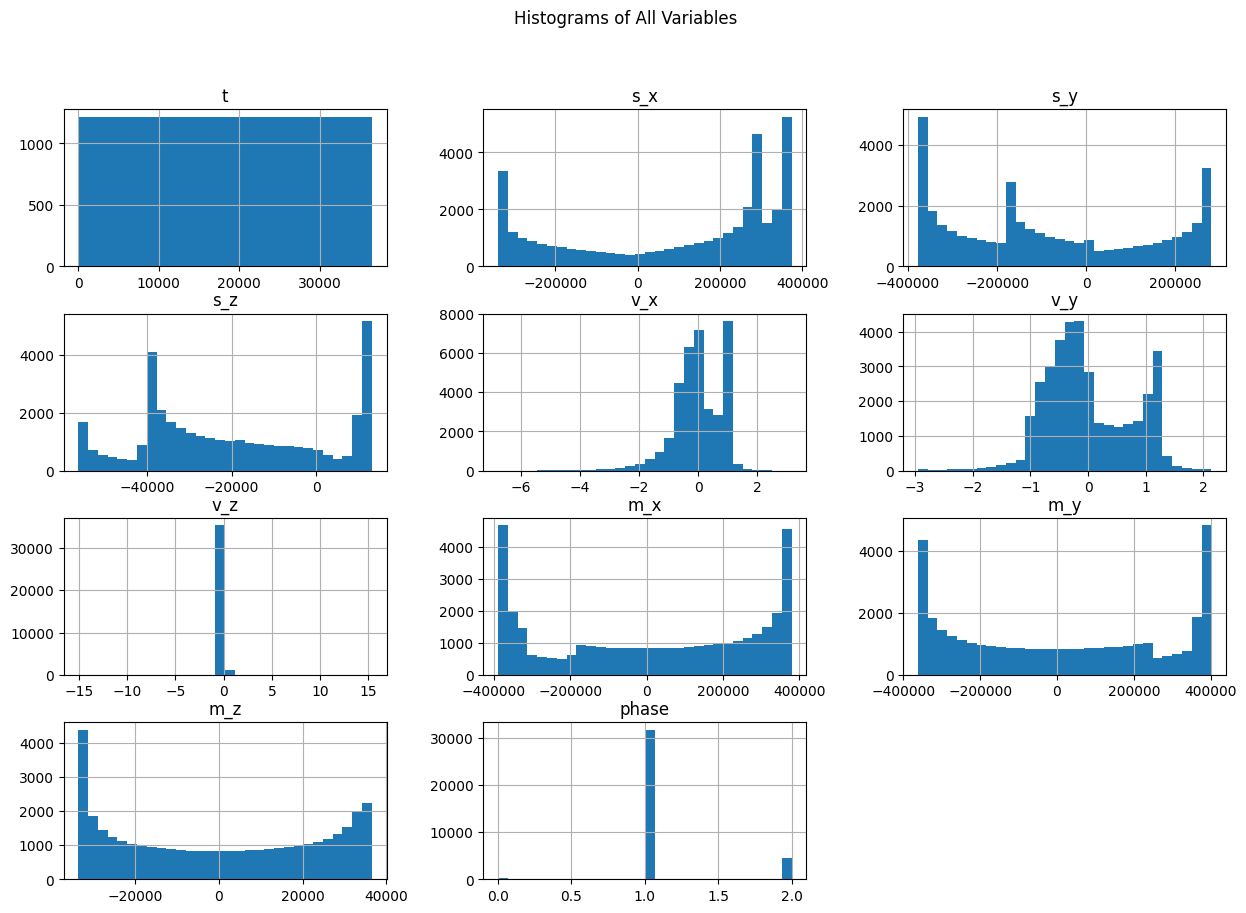

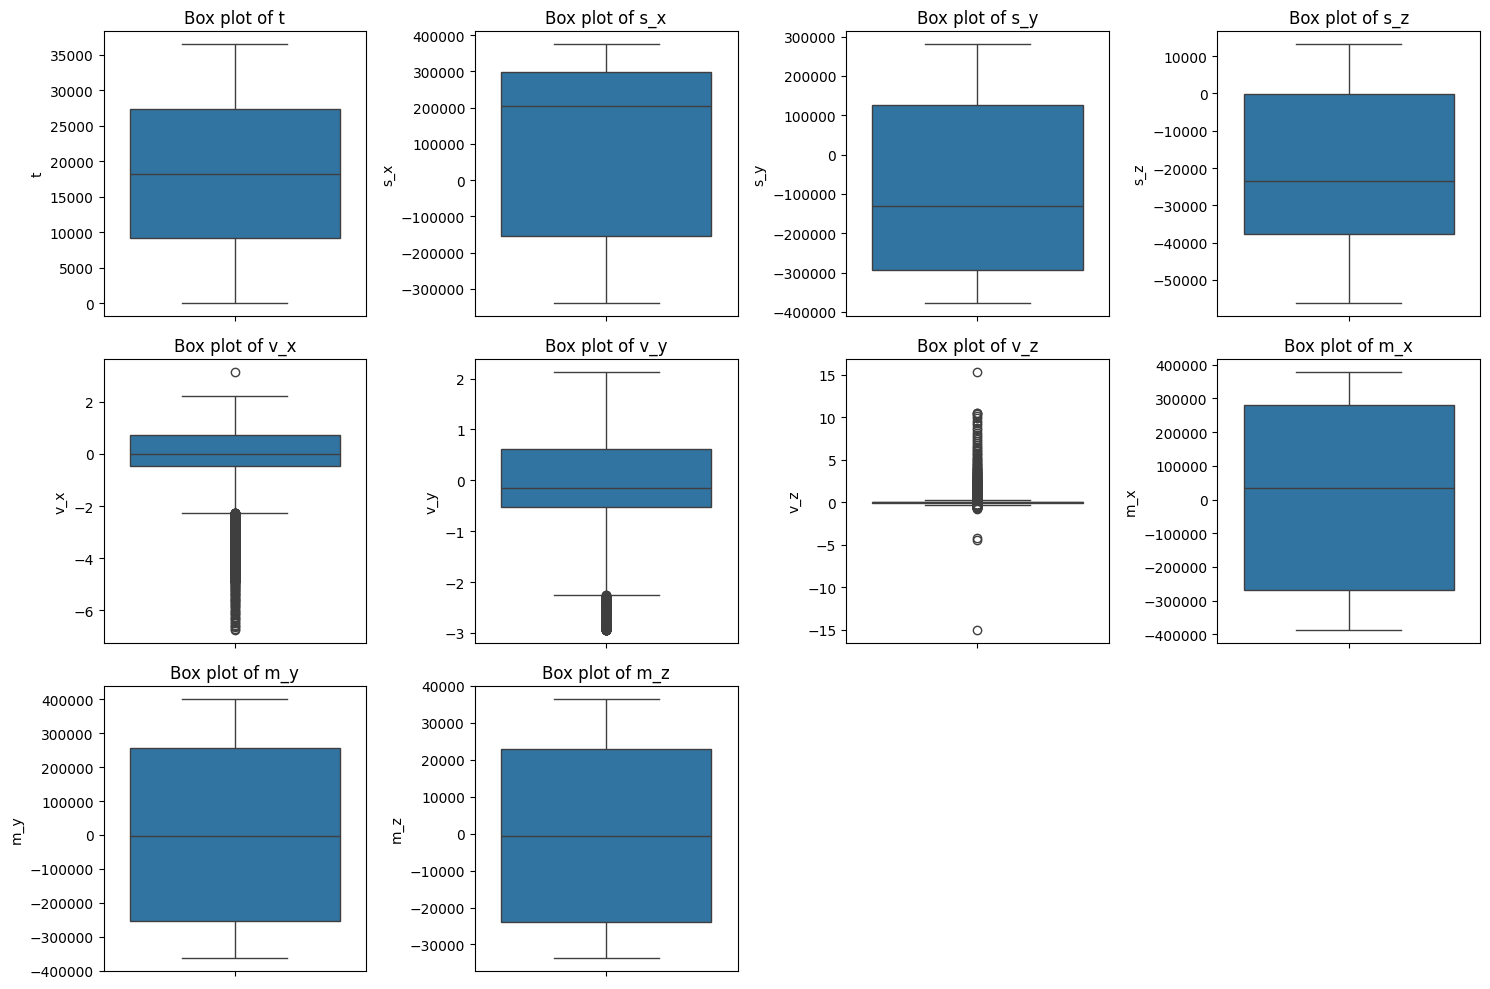

In [6]:
# Basic Statistical Analysis

# Calculate descriptive statistics for all numerical columns
statistics = data.describe()
print(statistics)

# Generate histograms for each variable
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of All Variables')
plt.show()

# Generate box plots for each variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'phase' column
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# 3D Trajectory Visualization
Create 3D plots showing the trajectory using spatial coordinates (s_x, s_y, s_z). Add color coding based on time or phase to enhance visualization.

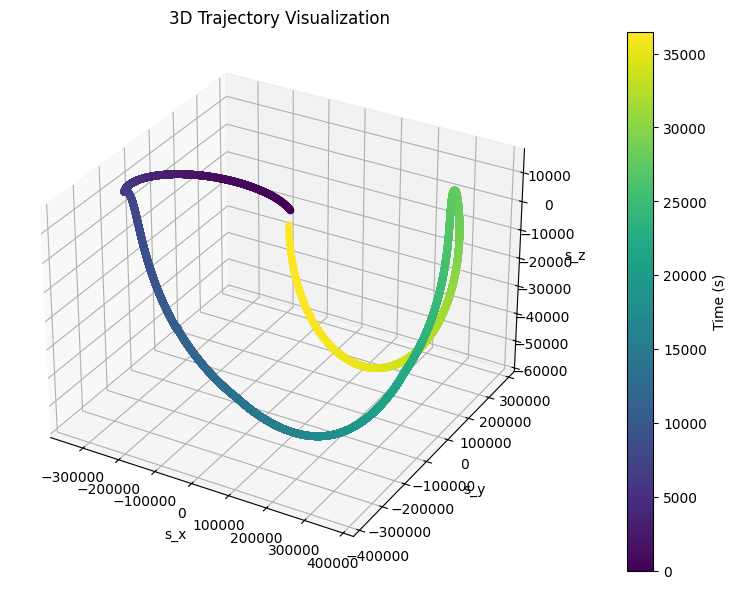

In [7]:
# 3D Trajectory Visualization

from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot for the trajectory
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory using spatial coordinates (s_x, s_y, s_z)
sc = ax.scatter(data['s_x'], data['s_y'], data['s_z'], c=data['t'], cmap='viridis', marker='o')

# Add color bar to show the time or phase
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Time (s)')

# Set labels for axes
ax.set_xlabel('s_x')
ax.set_ylabel('s_y')
ax.set_zlabel('s_z')

# Set title for the plot
ax.set_title('3D Trajectory Visualization')

# Show the plot
plt.show()

# Velocity Analysis
Visualize velocity components (v_x, v_y, v_z) over time. Calculate speed magnitude and visualize its changes throughout the trajectory.

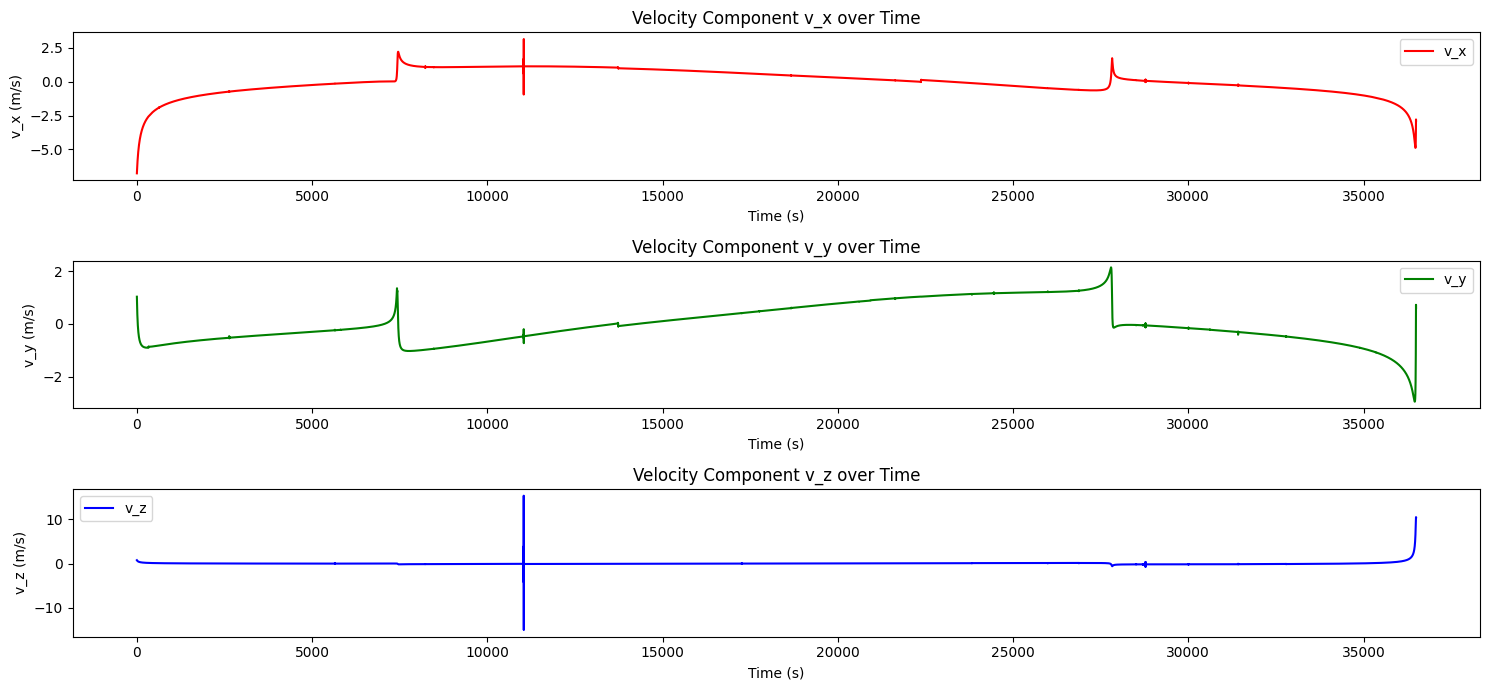

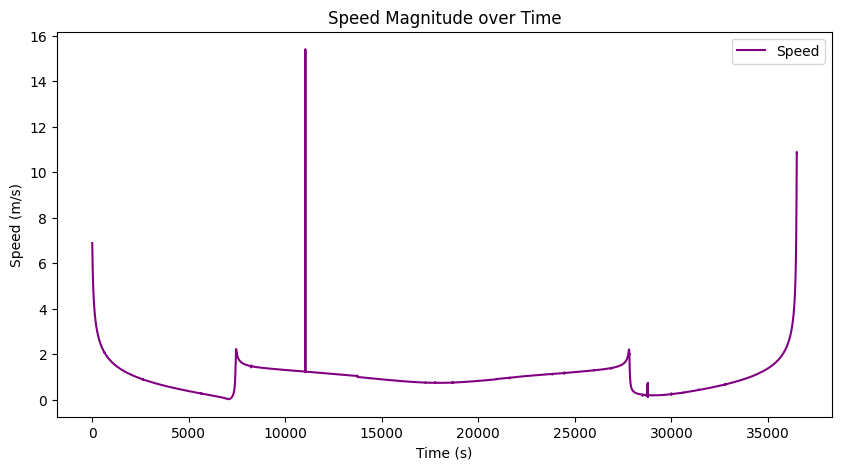

In [8]:
# Velocity Analysis

# Visualize velocity components (v_x, v_y, v_z) over time
plt.figure(figsize=(15, 7))

# Plot v_x over time
plt.subplot(3, 1, 1)
plt.plot(data['t'], data['v_x'], label='v_x', color='r')
plt.xlabel('Time (s)')
plt.ylabel('v_x (m/s)')
plt.title('Velocity Component v_x over Time')
plt.legend()

# Plot v_y over time
plt.subplot(3, 1, 2)
plt.plot(data['t'], data['v_y'], label='v_y', color='g')
plt.xlabel('Time (s)')
plt.ylabel('v_y (m/s)')
plt.title('Velocity Component v_y over Time')
plt.legend()

# Plot v_z over time
plt.subplot(3, 1, 3)
plt.plot(data['t'], data['v_z'], label='v_z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('v_z (m/s)')
plt.title('Velocity Component v_z over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate speed magnitude and visualize its changes throughout the trajectory
data['speed'] = np.sqrt(data['v_x']**2 + data['v_y']**2 + data['v_z']**2)

plt.figure(figsize=(10, 5))
plt.plot(data['t'], data['speed'], label='Speed', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Speed Magnitude over Time')
plt.legend()
plt.show()

# Magnetic Field Analysis
Analyze the magnetic field components (m_x, m_y, m_z) with visualizations showing their magnitude and direction changes over the trajectory.

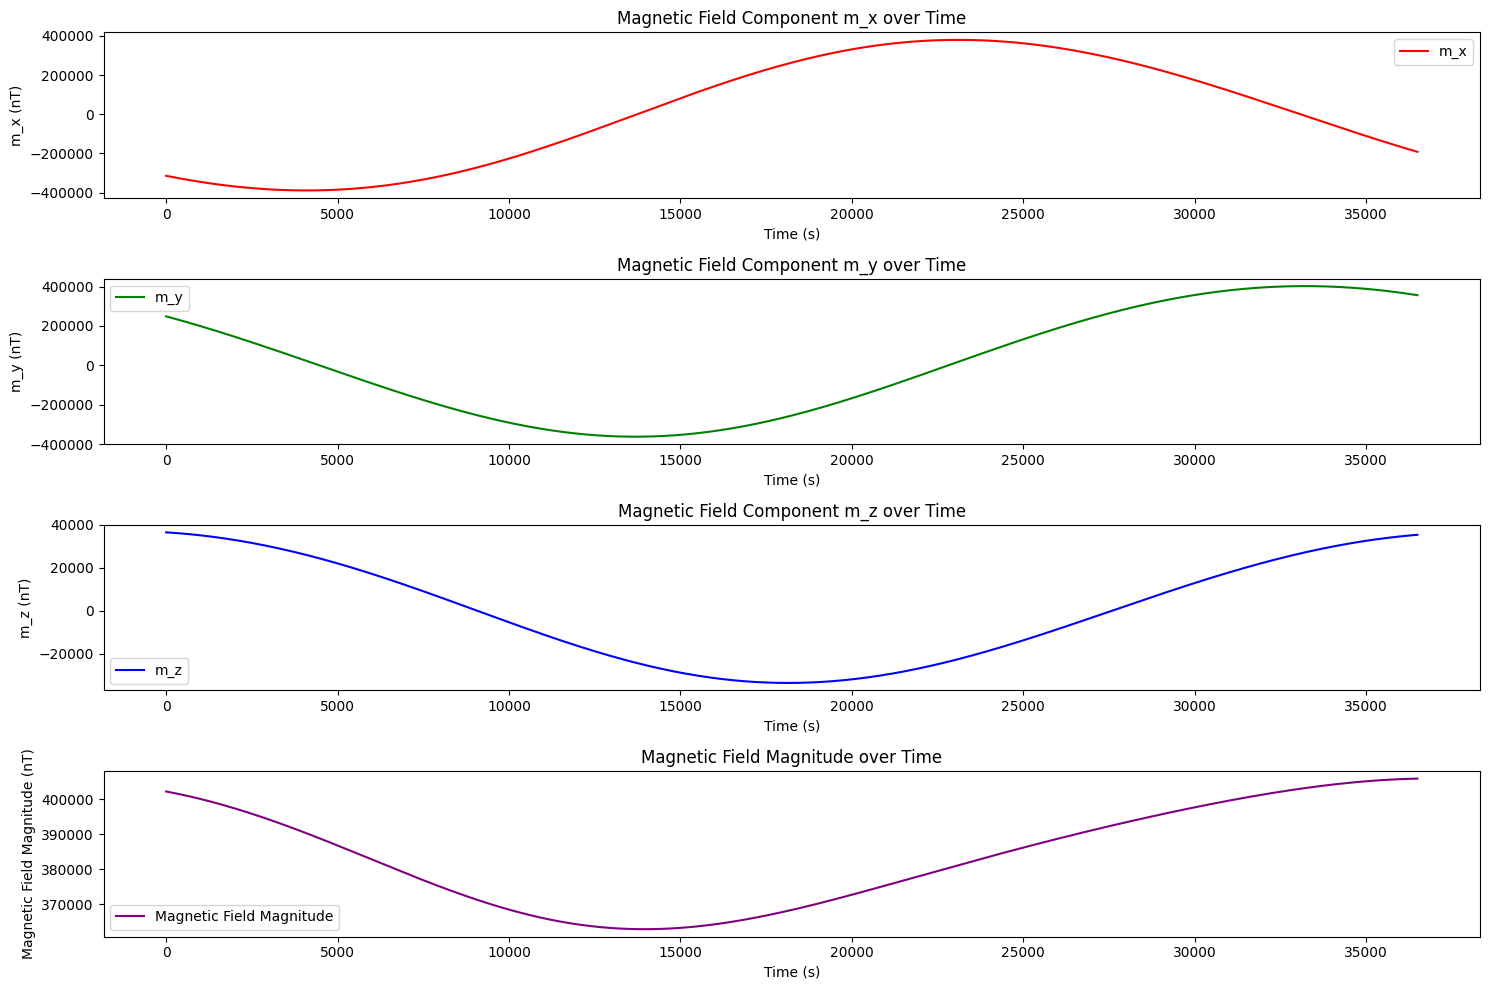

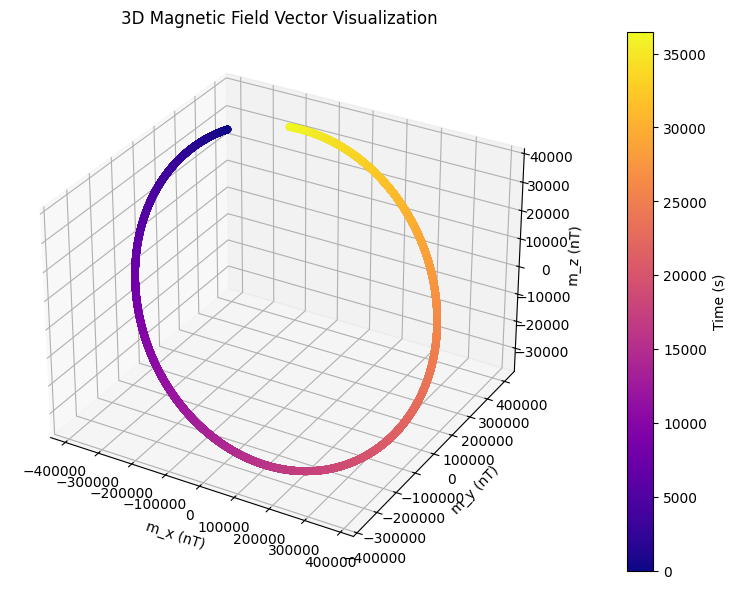

In [9]:
# Magnetic Field Analysis

# Calculate the magnitude of the magnetic field vector
data['magnetic_field_magnitude'] = np.sqrt(data['m_x']**2 + data['m_y']**2 + data['m_z']**2)

# Plot the magnetic field components over time
plt.figure(figsize=(15, 10))

# Plot m_x over time
plt.subplot(4, 1, 1)
plt.plot(data['t'], data['m_x'], label='m_x', color='r')
plt.xlabel('Time (s)')
plt.ylabel('m_x (nT)')
plt.title('Magnetic Field Component m_x over Time')
plt.legend()

# Plot m_y over time
plt.subplot(4, 1, 2)
plt.plot(data['t'], data['m_y'], label='m_y', color='g')
plt.xlabel('Time (s)')
plt.ylabel('m_y (nT)')
plt.title('Magnetic Field Component m_y over Time')
plt.legend()

# Plot m_z over time
plt.subplot(4, 1, 3)
plt.plot(data['t'], data['m_z'], label='m_z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('m_z (nT)')
plt.title('Magnetic Field Component m_z over Time')
plt.legend()

# Plot magnetic field magnitude over time
plt.subplot(4, 1, 4)
plt.plot(data['t'], data['magnetic_field_magnitude'], label='Magnetic Field Magnitude', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field Magnitude (nT)')
plt.title('Magnetic Field Magnitude over Time')
plt.legend()

plt.tight_layout()
plt.show()

# 3D Visualization of Magnetic Field Vector
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the magnetic field vector using components (m_x, m_y, m_z)
sc = ax.scatter(data['m_x'], data['m_y'], data['m_z'], c=data['t'], cmap='plasma', marker='o')

# Add color bar to show the time or phase
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Time (s)')

# Set labels for axes
ax.set_xlabel('m_x (nT)')
ax.set_ylabel('m_y (nT)')
ax.set_zlabel('m_z (nT)')

# Set title for the plot
ax.set_title('3D Magnetic Field Vector Visualization')

# Show the plot
plt.show()

# Phase Analysis
Explore the phase variable to understand what it represents. Group data by phase and compare metrics across different phases if multiple phases exist.

Phase counts:
 phase
1    31731
2     4462
0      306
Name: count, dtype: int64
Mean values grouped by phase:
                   t            s_x            s_y           s_z       v_x  \
phase                                                                       
0      20141.444445   -5406.830329    9440.370086 -10360.332103 -4.129193   
1      18341.414957  111721.242772 -100567.854613 -22796.291444  0.004987   
2      17462.019498   -5136.419980   13250.373584   1328.072716  0.268160   

            v_y       v_z            m_x            m_y           m_z  \
phase                                                                   
0     -1.529816  1.877372 -245067.459136  307725.977198  35825.495634   
1     -0.018729 -0.013037   19178.518983    2813.204741   -999.072649   
2      0.175310 -0.049677  -17562.394919   30497.832013   3207.014250   

          speed  magnetic_field_magnitude  
phase                                      
0      5.236224             404113.586211  
1    

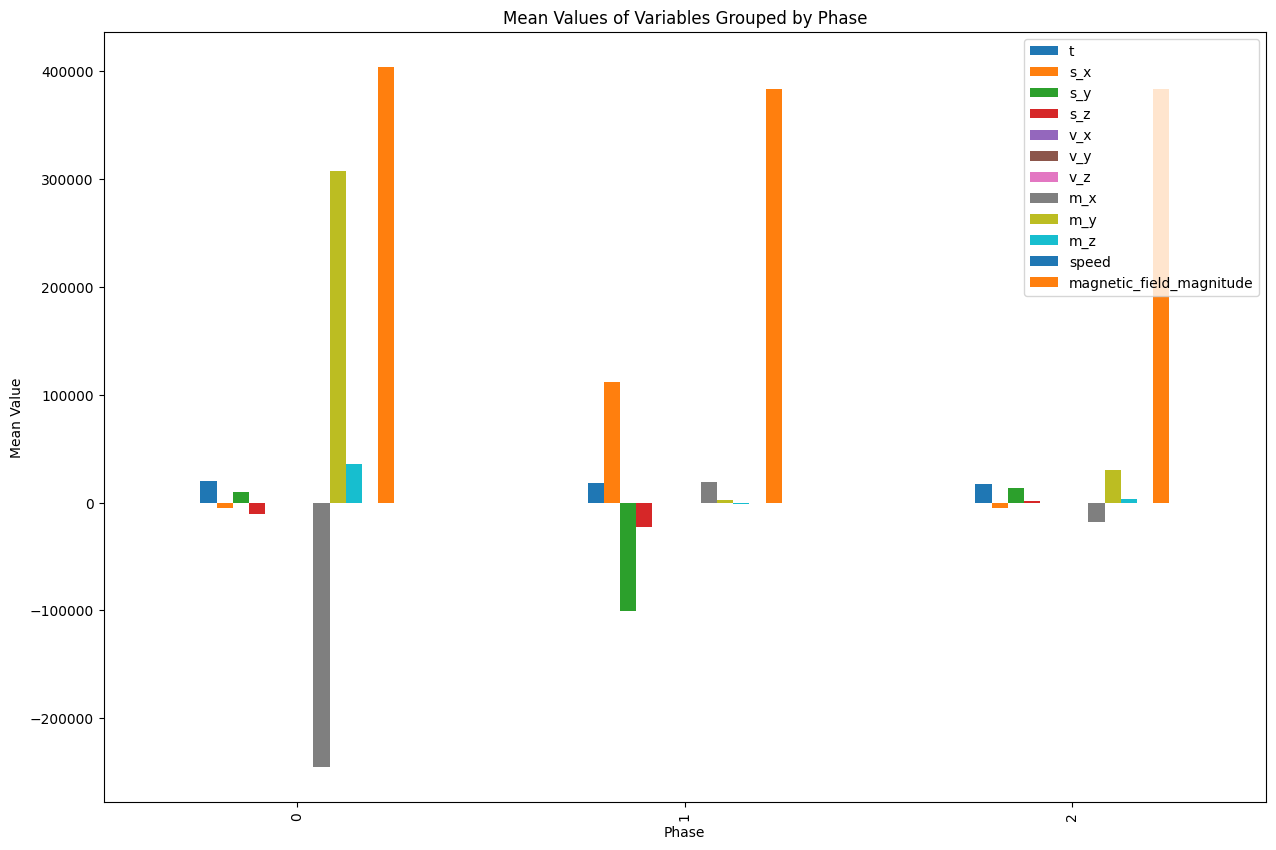

In [10]:
# Phase Analysis

# Explore the phase variable to understand what it represents
phase_counts = data['phase'].value_counts()
print("Phase counts:\n", phase_counts)

# Group data by phase and compare metrics across different phases if multiple phases exist
if len(phase_counts) > 1:
    phase_grouped = data.groupby('phase').mean()
    print("Mean values grouped by phase:\n", phase_grouped)

    # Visualize the mean values of each variable grouped by phase
    phase_grouped.plot(kind='bar', figsize=(15, 10))
    plt.title('Mean Values of Variables Grouped by Phase')
    plt.xlabel('Phase')
    plt.ylabel('Mean Value')
    plt.legend(loc='upper right')
    plt.show()
else:
    print("Only one phase present in the data.")

# Time Series Analysis
Perform time series analysis to identify patterns, trends, or periodicities in the position, velocity, or magnetic field data.

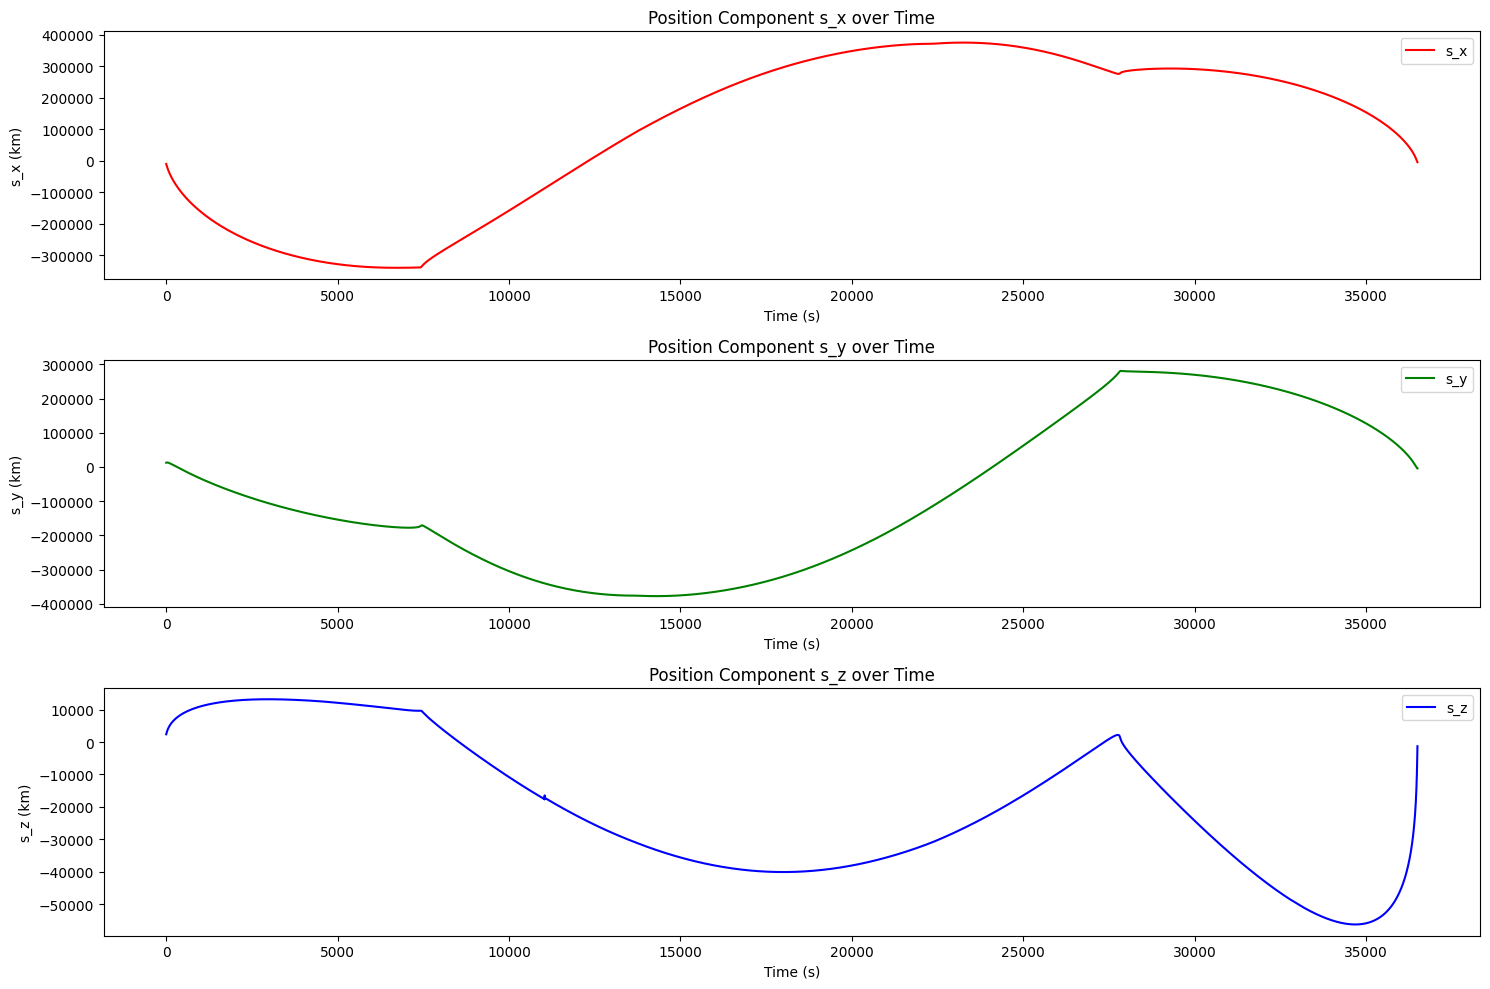

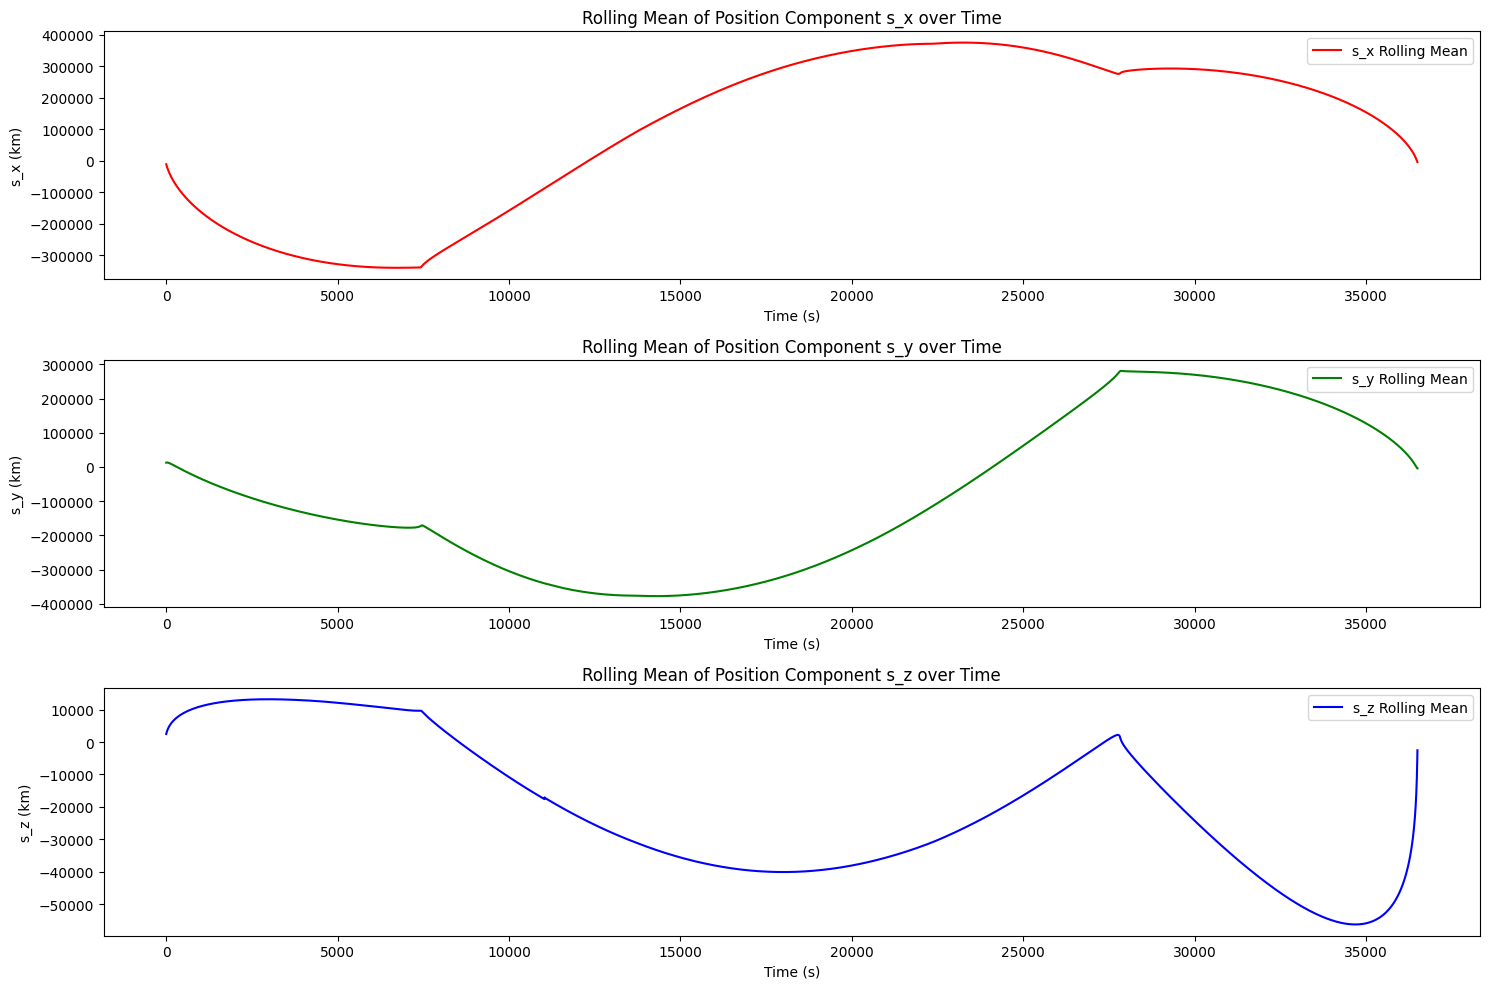

In [12]:
# Time Series Analysis

# Plot position components (s_x, s_y, s_z) over time
plt.figure(figsize=(15, 10))

# Plot s_x over time
plt.subplot(3, 1, 1)
plt.plot(data['t'], data['s_x'], label='s_x', color='r')
plt.xlabel('Time (s)')
plt.ylabel('s_x (km)')
plt.title('Position Component s_x over Time')
plt.legend()

# Plot s_y over time
plt.subplot(3, 1, 2)
plt.plot(data['t'], data['s_y'], label='s_y', color='g')
plt.xlabel('Time (s)')
plt.ylabel('s_y (km)')
plt.title('Position Component s_y over Time')
plt.legend()

# Plot s_z over time
plt.subplot(3, 1, 3)
plt.plot(data['t'], data['s_z'], label='s_z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('s_z (km)')
plt.title('Position Component s_z over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Perform a rolling mean to smooth the data and identify trends
window_size = 5  # Define the window size for the rolling mean

# Calculate rolling mean for position components
data['s_x_rolling'] = data['s_x'].rolling(window=window_size).mean()
data['s_y_rolling'] = data['s_y'].rolling(window=window_size).mean()
data['s_z_rolling'] = data['s_z'].rolling(window=window_size).mean()

# Plot the rolling mean of position components
plt.figure(figsize=(15, 10))

# Plot rolling mean of s_x
plt.subplot(3, 1, 1)
plt.plot(data['t'], data['s_x_rolling'], label='s_x Rolling Mean', color='r')
plt.xlabel('Time (s)')
plt.ylabel('s_x (km)')
plt.title('Rolling Mean of Position Component s_x over Time')
plt.legend()

# Plot rolling mean of s_y
plt.subplot(3, 1, 2)
plt.plot(data['t'], data['s_y_rolling'], label='s_y Rolling Mean', color='g')
plt.xlabel('Time (s)')
plt.ylabel('s_y (km)')
plt.title('Rolling Mean of Position Component s_y over Time')
plt.legend()

# Plot rolling mean of s_z
plt.subplot(3, 1, 3)
plt.plot(data['t'], data['s_z_rolling'], label='s_z Rolling Mean', color='b')
plt.xlabel('Time (s)')
plt.ylabel('s_z (km)')
plt.title('Rolling Mean of Position Component s_z over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Perform Fourier Transform to identify periodicities in the position data
from scipy.fft import fft, fftfreq

# Define a function to perform FFT and plot the results
def plot_fft(data, column, title):
    N = len(data)
    T = data['t'][1] - data['t'][0]  # Sample spacing
    yf = fft(data[column])
    xf = fftfreq(N, T)[:N//2]

    plt.figure(figsize=(10, 5))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title(f'Fourier Transform of {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()


# Correlation Analysis
Generate correlation matrices and heatmaps to identify relationships between different variables. Investigate any strong correlations found.

Correlation Matrix:
                                  t       s_x       s_y       s_z       v_x  \
t                         1.000000  0.776285  0.641580 -0.716350 -0.183082   
s_x                       0.776285  1.000000  0.327385 -0.709879 -0.001155   
s_y                       0.641580  0.327385  1.000000 -0.032995 -0.585537   
s_z                      -0.716350 -0.709879 -0.032995  1.000000 -0.120236   
v_x                      -0.183082 -0.001155 -0.585537 -0.120236  1.000000   
v_y                       0.188741  0.622153 -0.004139 -0.101316  0.196235   
v_z                       0.103519  0.032327  0.019705 -0.004739 -0.426251   
m_x                       0.643058  0.955205  0.202533 -0.554594  0.151311   
m_y                       0.586875  0.239774  0.960508 -0.060105 -0.741295   
m_z                      -0.022113 -0.503822  0.576371  0.355301 -0.665254   
phase                    -0.031009 -0.134442  0.148865  0.340467  0.218404   
speed                    -0.016961 -0.05638

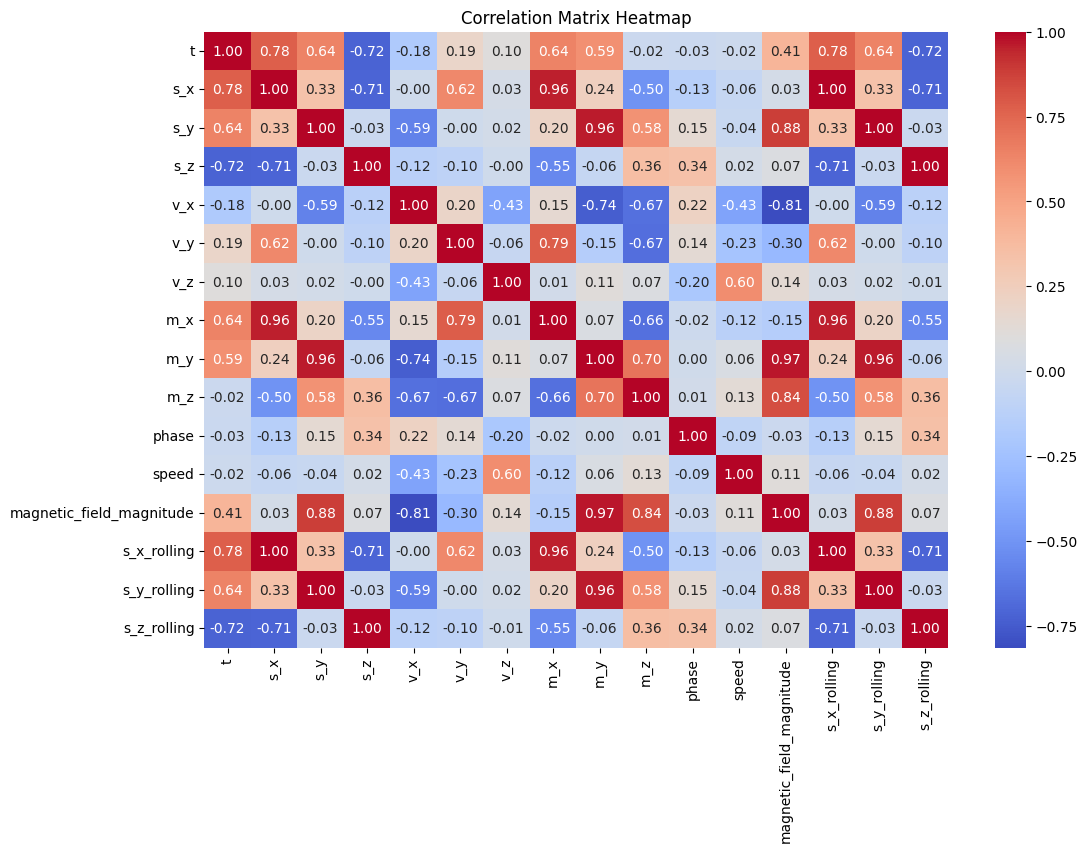

Strong Correlations:
                                  t       s_x       s_y       s_z       v_x  \
t                              NaN  0.776285       NaN -0.716350       NaN   
s_x                       0.776285       NaN       NaN -0.709879       NaN   
s_y                            NaN       NaN       NaN       NaN       NaN   
s_z                      -0.716350 -0.709879       NaN       NaN       NaN   
v_x                            NaN       NaN       NaN       NaN       NaN   
v_y                            NaN       NaN       NaN       NaN       NaN   
v_z                            NaN       NaN       NaN       NaN       NaN   
m_x                            NaN  0.955205       NaN       NaN       NaN   
m_y                            NaN       NaN  0.960508       NaN -0.741295   
m_z                            NaN       NaN       NaN       NaN       NaN   
phase                          NaN       NaN       NaN       NaN       NaN   
speed                          NaN       N

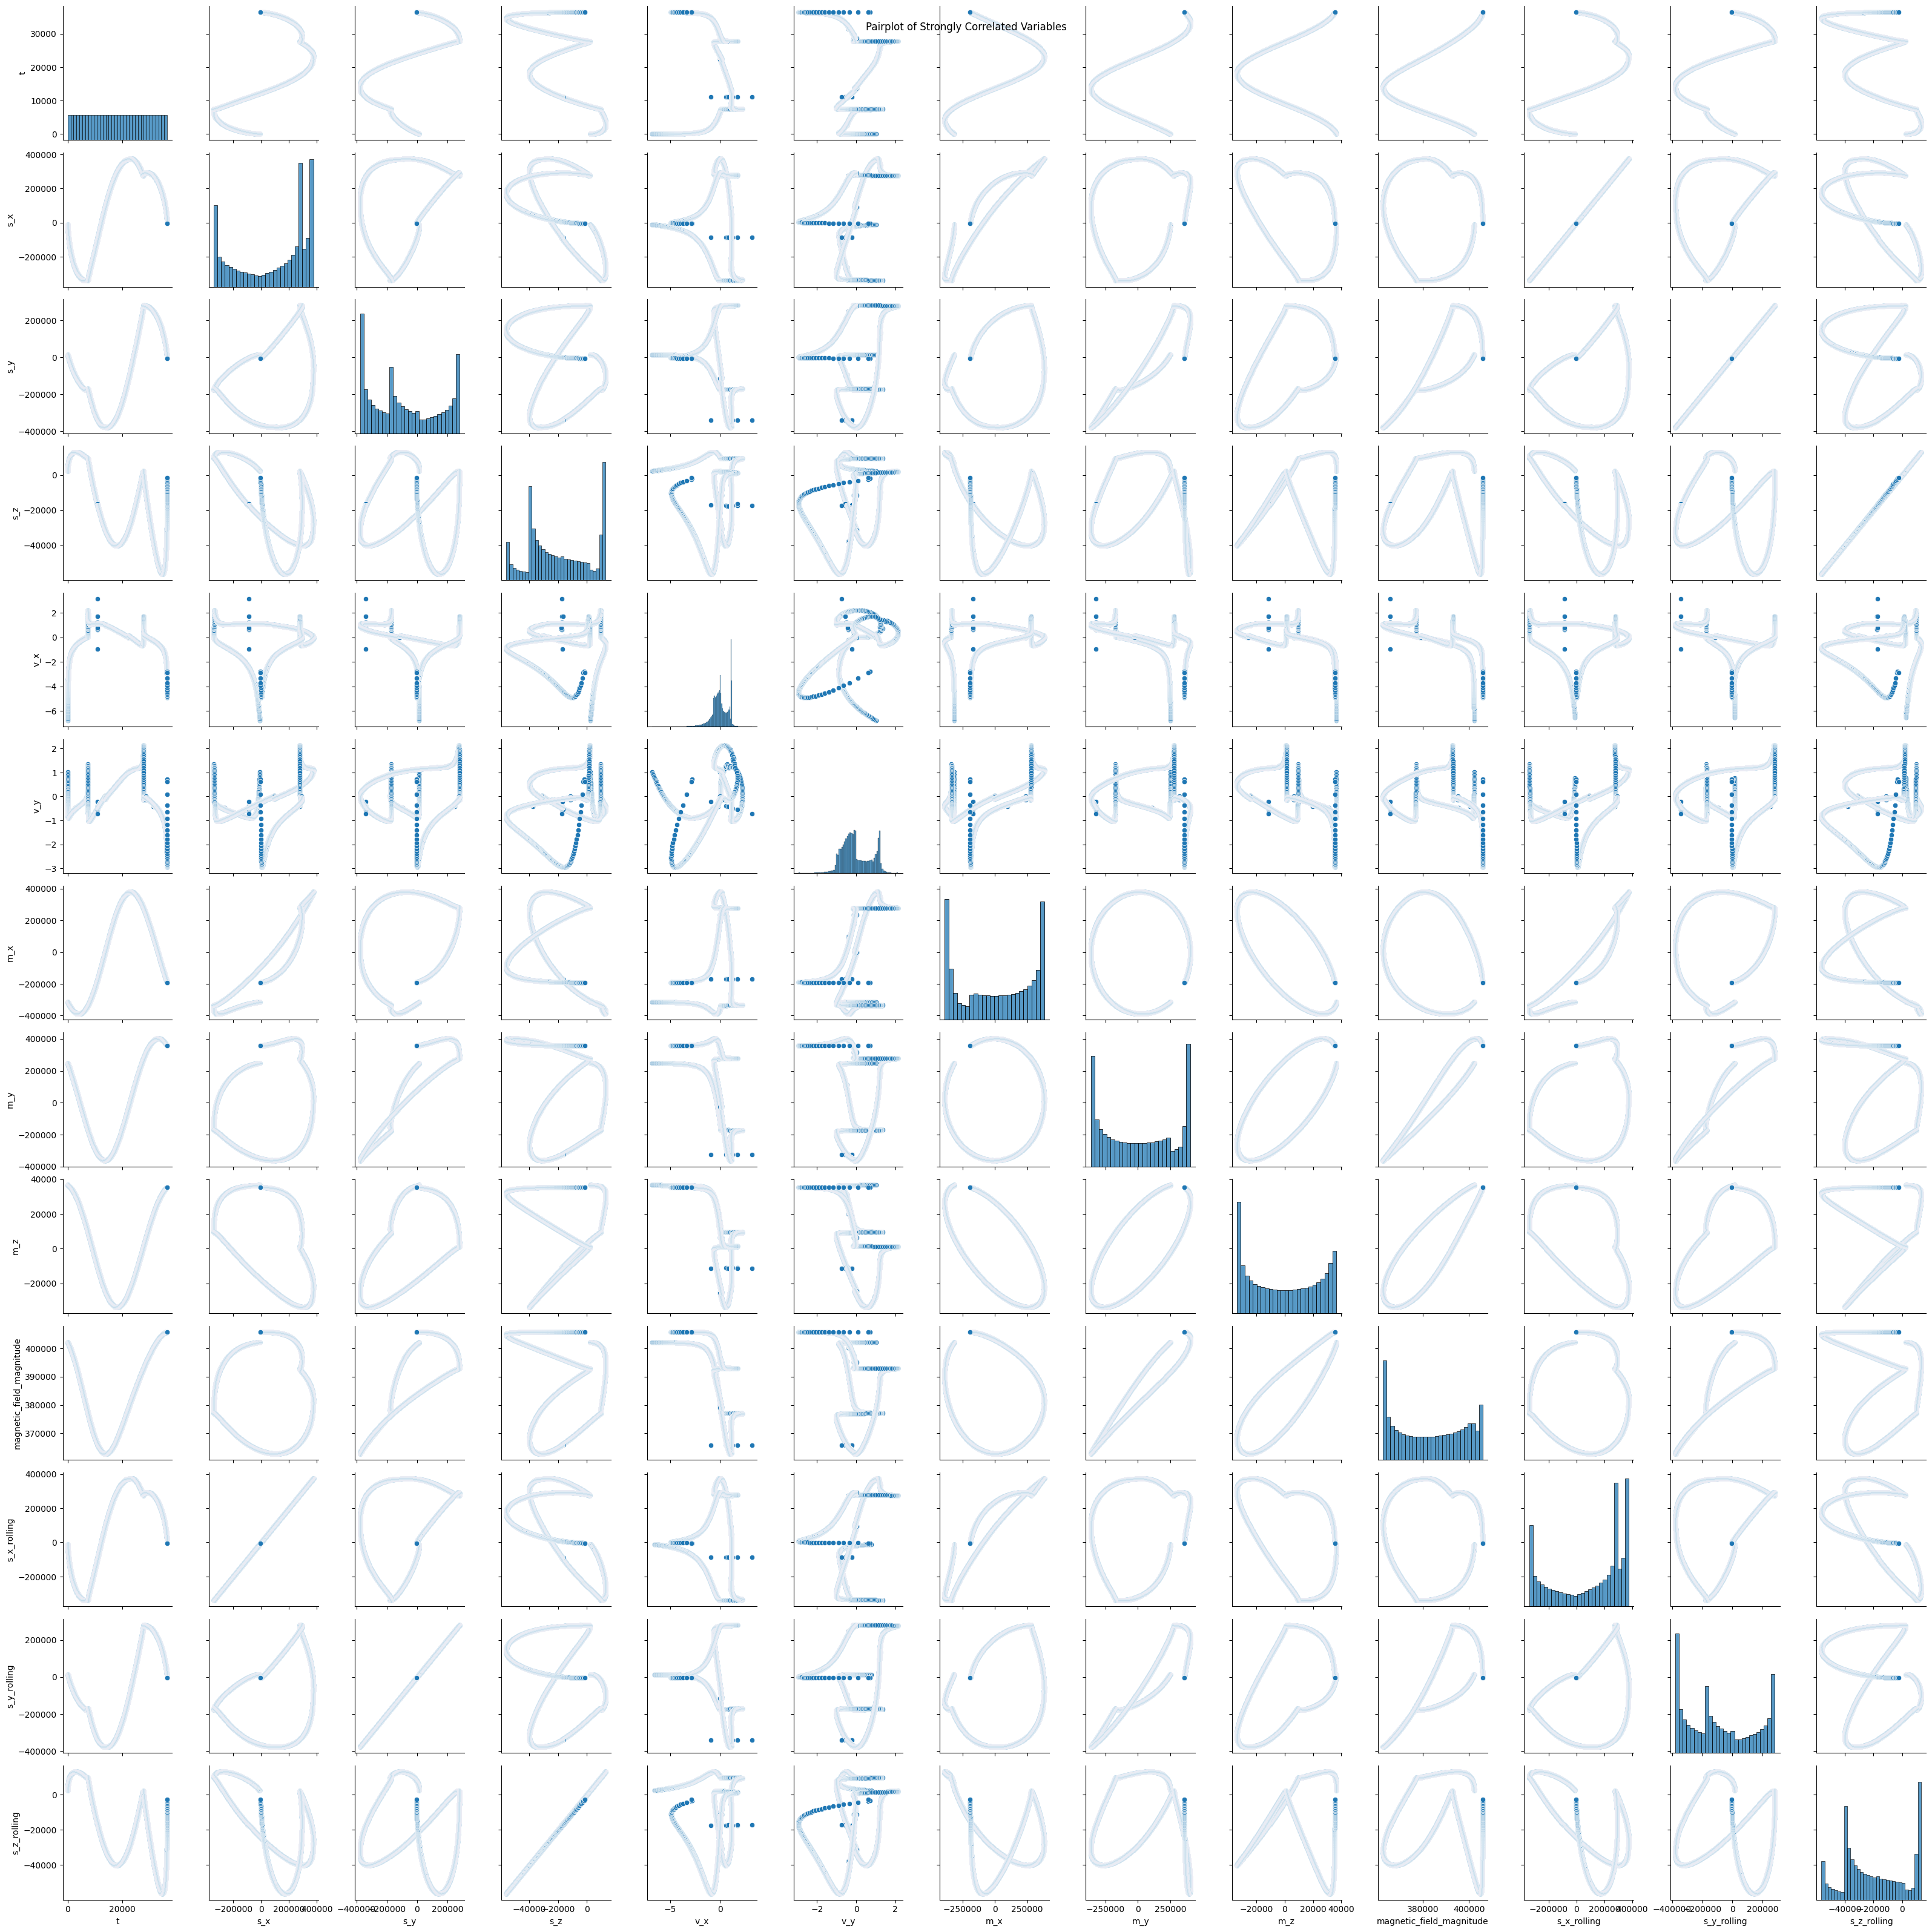

In [13]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Investigate strong correlations (absolute value > 0.7)
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)]
print("Strong Correlations:\n", strong_correlations)

# Visualize pairs with strong correlations using pairplot
strong_corr_pairs = strong_correlations.dropna(how='all').dropna(axis=1, how='all').columns
sns.pairplot(data[strong_corr_pairs])
plt.suptitle('Pairplot of Strongly Correlated Variables')
plt.show()